# <font color="purple">SNR Result</font>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
column = [100,50,45,40,33,0]
# add results
resnet_adv = [0.692147,0.697382,0.68534,0.664921,0.6274,0]
resnet = [0.695462,0.65096,0.616056,0.549738,0.434555,0]

In [3]:
parseval = [0.730541, 0.678883, 0.649215, 0.577661, 0.413613,0]
parseval_adv = [0.717277, 0.706632, 0.702967, 0.690576, 0.661431,0]

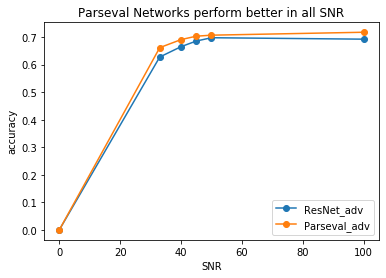

In [6]:
legend = ["ResNet_adv","Parseval_adv"]
#plt.plot(column, resnet, 'o-')
plt.plot(column, resnet_adv, 'o-')
#plt.plot(column, parseval, 'o-')
plt.plot(column, parseval_adv, 'o-')
plt.title("Parseval Networks perform better in all SNR")
plt.ylabel('accuracy')
plt.xlabel('SNR')
plt.legend(legend, loc='lower right')
plt.show()